<h1 style="text-align: center;" markdown="1">AI Winter School 2019</h1> 
<h2 style="text-align: center;" markdown="2">Dec 10 - Dec 20, 2019</h2>
<h3 style="text-align: center;" markdown="3">Lab on Logistic Regression</h3>


> *This notebook is part of the AI Winter School 2019 organized by NAAMII. The objectives of this notebook is to use Logistic Regression to predict whether an individual survived or not during the sinking of the Titanic. The data used in this exercise is adopted from https://www.kaggle.com/c/titanic/data.*

# Table of Contents

[Introduction](#introduction)    
&nbsp;&nbsp;&nbsp;[Explanation and Theory](#introduction-theory)    
&nbsp;&nbsp;&nbsp;[Considerations](#introduction-considerations)    
[Data Setup](#setup)  
&nbsp;&nbsp;&nbsp;[Meta data](#variables)  
&nbsp;&nbsp;&nbsp;[Correlation](#correlation)  
&nbsp;&nbsp;&nbsp;[Dummy variables for Categorical Data](#dummy)      
[Scikit-Learn Logistic Regression](#sklearn-logreg)  
[Summary](#summary)

# Logistic Regression Classifier Introduction <a class="anchor" id="introduction"></a>

Logistic regression is one of the most simple and well-known machine learning algorithms for classification. Despite its name, it is used for classification rather than regression. 

<b>In basic terms, it predicts the probability of occurrence of an event by fitting the data to a logistic function. This probability is then translated into a class label based on the set threshold of the function.</b>

## Explanation and Theory <a class="anchor" id="introduction-theory"></a>

**Assumptions and properties.** 
Suppose we have a data set that consists of n samples and m features

\begin{equation}
\label{eqn:samples}
\mathbf{X} = \{\mathbf{x_1}, \mathbf{x_2}, \ldots \mathbf{x_n}\}, \quad   \mathbf{x_i} \in \mathbb{R}^{m}
\end{equation}

where

\begin{equation}
\label{eqn:features}
\mathbf{x_i} =  (x_i^{(1)}, x_i^{(2)}, \ldots x_i^{(m)} ) ^T
\end{equation}

The target variable is the probability of a sample belonging to a certain class and is represented by
\begin{equation}
\label{eqn:target}
\mathbf{Y}= \{y_1, y_2 \ldots y_n \} \quad where \,\,\, y_i \in (0,1)
\end{equation}

Let us assume our problem is a binary classification problem, meaning the response/dependent variables has two classes or labels 0 and 1. If we used linear regression, it would give us a straight line that best separates 0 and 1 responses. However, we could not use this line to give us a probability, since it would give us a negative value for the responses near zero on the x-axis. Instead, when we use logistic regression, we fit this data and estimate the target variable using the following **logistic/sigmoid function**:  
\begin{equation}
\label{eqn:sigmoid}
y_i =\frac {e^{(\beta_0 + \mathbf{\beta} \cdot \mathbf{x_i})}} {(1 + e^{(\beta_0 + \mathbf{\beta} \cdot \mathbf{x_i})})}
\end{equation}
where $\beta_0$ is called the bias term or the intercept, and $\mathbf{\beta}$ are the coefficients associated with the feature vector $\mathbf{x_i}$. 
### logistic function diagram
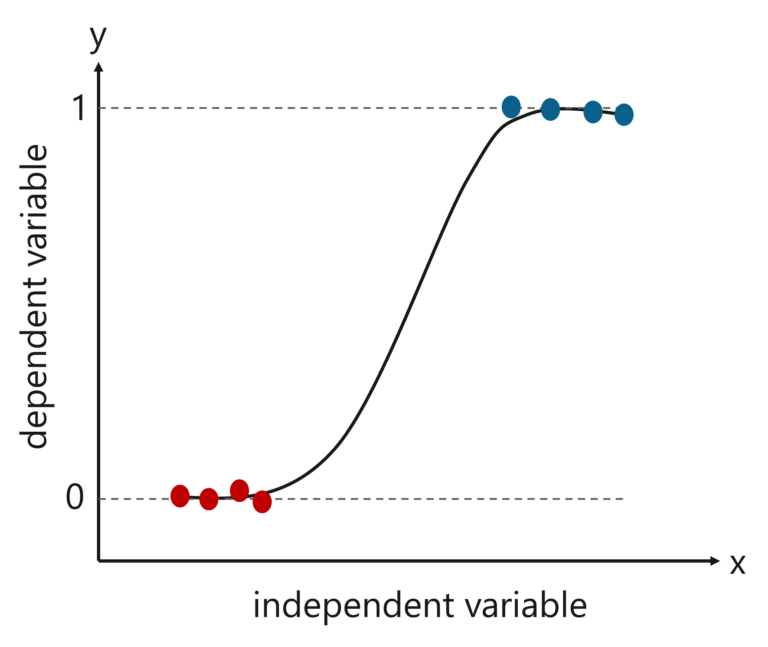 

The function transforms all input variables to the range [0,1], which brings the smallest or most negative numbers close to zero and the largest positive numbers close to one. This allows us to take real-valued inputs and output a probability of the input belonging to either class zero or one. We can then choose a threshold value, such as 0.5, and provide the class output.

**Algorithm and Training.** Logistic regression takes the form of a linear model:

$$f(i)=\beta_0+\beta_1x_{1,i}+...+\beta_mx_{m,i} $$

where $\beta_0,...,\beta_m$ are the regression coefficients or weights assigned to each feature $x$. For each data point $i$, a pseudo-variable $x_{0,i}=1$ is added to correspond to the intercept coefficient $\beta_0$. This allows us to write the model in vector form as:
$$f(i)=\boldsymbol{\beta}\cdot\boldsymbol{X_i}$$

When we train the logistic regression classifier, we are trying to find the best values of $\beta$ to match the data. This is done using an estimation method that attempts to minimize the error of the model. There are several techniques to do this, such as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

## Considerations <a class="anchor" id="introduction-considerations"></a>

There are a few things to remember when using logistic regression as a classifier. First, it assumes that there is a linear relationship between the independent variables and the dependent variables. In high-dimensional datasets, this may not be the case, so logistic regression may not be the best choice of classifier.

Logisitic regression is also sensitive to highly correlated inputs. Having highly correlated inputs can cause the model to be overfit or will cause the model to fail to converge. We will take a closer look at the correlations between different variables in this notebook. 

# Data setup <a class="anchor" id="setup"></a>


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Our goal is to use predict if an individual survived or not in the titanic ship wreck. 


In [1]:
# All our imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Run this only if you are using Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Enter the path of your file inside the quotes
path = "C:/Users/Administrator/dataset/titanic_clean.csv"

In [3]:
#Write the code to read the csv file to a dataframe df
df = pd.read_csv(path)

In [4]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Initial'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.066409,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.244532,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Initial
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


# Variable Metadata <a class="anchor" id="variables"></a>
**Pclass:** A proxy for socio-economic status (SES)

1 = Upper

2 = Middle

3 = Lower

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**SibSp:** The dataset defines family relations in this way:

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


**Parch:** The dataset defines family relations in this way:
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Embarked:** The port from where the particular passenger was embarked/boarded. 

**Survived:** 
0: if the person did not survive
1: if the person survived

In [7]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Initial
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


In [11]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
Survived       False
Initial        False
dtype: bool

# Correlation between variables<a class="anchor" id="correlation"></a>

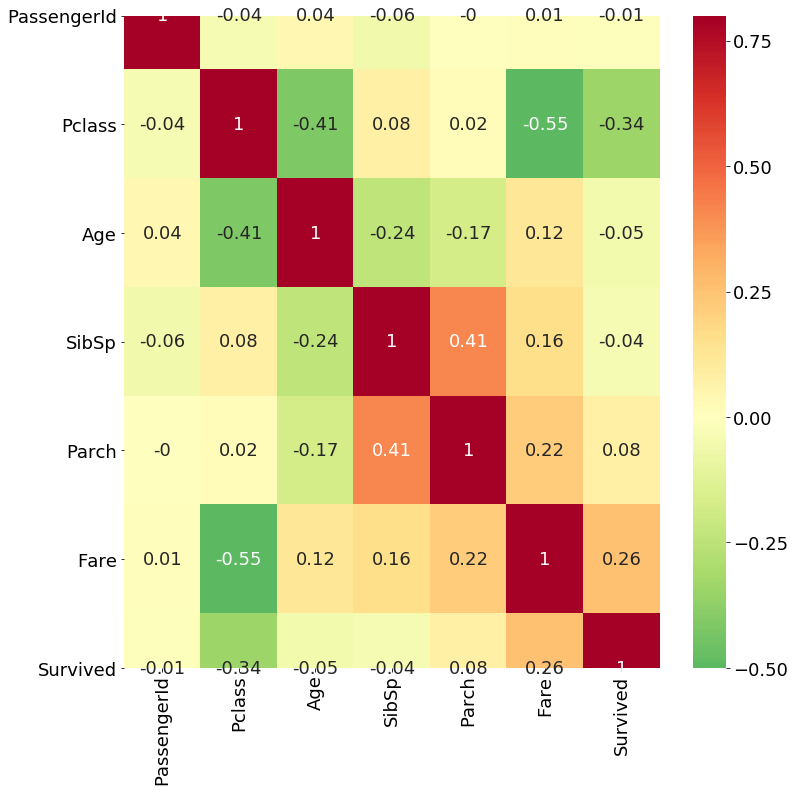

In [8]:
variables = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Initial']
# Calculate the correlations
corr_mat = df[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

## Let's see how many  people survived and how many didn't make it  

Survived
0    549
1    342
dtype: int64


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

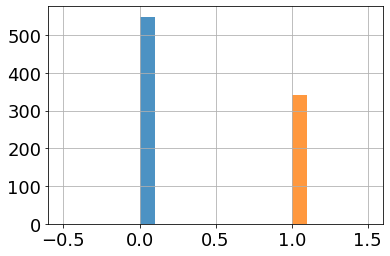

In [93]:
output_count = df.groupby('Survived').size()
print(output_count)

df.groupby('Survived').Survived.hist(alpha=0.8)

### Let us look at the dataset. What columns do you think are important variables to detect Survival? Does Name matter? Or, does Ticket number matter? What about Pclass?

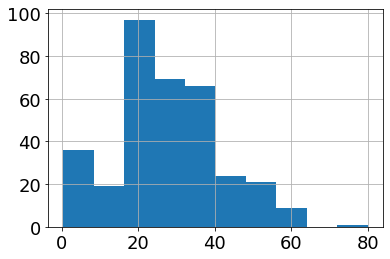

In [9]:
df[df['Survived']==1].Age.hist()

In [10]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
df.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

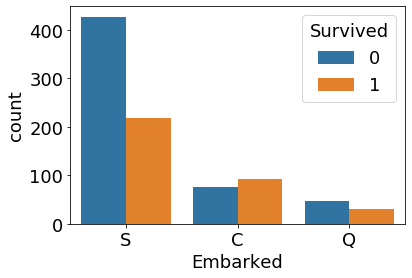

In [12]:
sns.countplot('Embarked',hue='Survived',data=df)

In [13]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

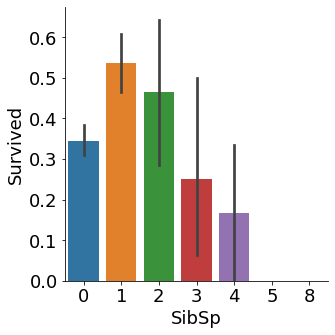

In [14]:
sns.catplot(x="SibSp", y="Survived", data=df,  kind="bar")

# Dummy variables for categorical data <a class="anchor" id="dummy"></a>
Sex and Embarked are categorical data. We will eventually be using Scikit-learn to create our ML model which expects numeric data. We will have to convert categorical variable into dummy/indicator variables.

In [15]:
# Try this, what do you see
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


### The Dummy Variable Trap - In one hot encoding the dummy variables created are correlated i.e.  one dummy variable can be predicted from the other.  In this encoding method, for each value of a categorical variable, a new variable is created to determine the presence or absence of each value in a categorical variable. 
>
<font color = red>Let us create dummy variables for "Sex" column. As you might have noticed, instead of storing male as 0 and 1,and females as 0 and 1, storing one of them will suffice as they are mutually exclusive in our dataset. Therefore, we use the drop_first argument.</font>


In [16]:
sex = pd.get_dummies(df['Sex'], drop_first = True)


In [17]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
# Lets do the same with our Embarked variable, what do you think will happen
# when three variables are converted to dummy variables with drop_first argument?
#We do this to avoid something called the "dummy variable trap". 

#Write the code to create dummy variables for "Embarked"
embrkd = pd.get_dummies(df['Embarked'], drop_first = True)
embrkd.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
# Removing Categorical Columns we decided not to use 
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)  # inplace = True  replaces the old dataframe 
                                                                        #with the newly modified dataframe in the same location

In [21]:
# what does the dataset look like now
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial
0,1,3,22.0,1,0,7.2500,0,Mr
1,2,1,38.0,1,0,71.2833,1,Mrs
2,3,3,26.0,0,0,7.9250,1,Miss
3,4,1,35.0,1,0,53.1000,1,Mrs
4,5,3,35.0,0,0,8.0500,0,Mr


In [23]:
# Lets add our dummy/indicator columns back to the dataset 
df = pd.concat([df, sex, embrkd ], axis = 1) # i.e. concatenating the categorical data after dummy variable trap is processed

In [24]:
df.head()  # below figure represents the categorical variables after solving the dummy variable trap.
           #i.e. for column wth "Embarked" with three values we just used only two values 
           # like in Embarked we had Q,S,and C but we just used Q and S. Similarly for "Gender".  

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Initial,male,Q,S
0,1,3,22.0,1,0,7.2500,0,Mr,1,0,1
1,2,1,38.0,1,0,71.2833,1,Mrs,0,0,0
2,3,3,26.0,0,0,7.9250,1,Miss,0,0,1
3,4,1,35.0,1,0,53.1000,1,Mrs,0,0,1
4,5,3,35.0,0,0,8.0500,0,Mr,1,0,1


Also, PassengerID is simply used for identification purposes, and Survived holds the "label" data for our result. We can get rid of these columns. The Survived column is the data we feed the machine learning algorithms to learn from.  

In [51]:
traning_data_set = df.drop(['PassengerId', 'Initial','Survived'], axis=1)

In [52]:
traning_data_set.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [53]:
# Let us split the data in training and testing set. The test_size parameter allows you to control the ratio of 
# testing set you want to randomly capture from your data set. 
# With the random_state parameter you can guarantee that the output of Run 1 will be equal to the output of Run 2, 
# i.e. your split will be always the same.

# Also training dataset is split into X_train and X_test
# y_train is the corresponding output of X_train dataset . similarly for y_test i.e. both y_train and y_test are taken
#                                                                                    from the "Survived" column 


X_train, X_test, y_train, y_test = train_test_split(traning_data_set,df["Survived"],test_size =0.2, random_state=10)


In [54]:
# Let us look at the shape our training and testing splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [90]:
y_train.head()

57     0
717    1
431    1
633    0
163    0
Name: Survived, dtype: int64

In [55]:
# We will be using Logistic Regression for our purposes.
# If you look at the documentation, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are several additional parameters you can pass. For our purposes we will be using the defaults.

model = LogisticRegression()

In [56]:
model

LogisticRegression()

In [57]:
# Let us fit our training data
# This is where the learning is happening,
model.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [59]:
predictions = model.predict(X_test) # Feed X_test dataset in the model and predict its result from the model++
                                    # "predictions" is the output predicted by our trained model. 
                                    #  we must compare this value with the actaul output of the dataset given by y_test. 

In [60]:
# What did we predict?
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [ ]:
# What did our test dataset look like?

In [76]:
df_compare = X_test.reset_index(drop=True)  # for reset_index(drop = True) the dataframe's integer index will be dropped 
                                            # index acts like a way to select rows in a dataframe based on index number  

In [77]:
df_compare.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,35.0,0,0,7.1250,1,0,1
1,3,20.0,0,0,7.0500,1,0,1
2,3,26.0,0,0,7.8958,1,0,1
3,1,58.0,0,0,146.5208,0,0,0
4,1,35.0,1,0,83.4750,0,0,1


In [80]:
#Adding columns 'Survived' and 'Predicted' to df_compare.
df_compare['Survived'] = y_test.values # The X_test dataset has its corresponsing actual output "y_test" and we are going 
                                       # to compare it against our model's predicted output for the same  dataset represented+++ 
                                       # by "predictions" and then see how much of it matches with the actual output "survived"

In [81]:
df_compare['Predicted'] = predictions

In [83]:
df_compare.head(40)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,Predicted
0,3,35.0,0,0,7.1250,1,0,1,0,0
1,3,20.0,0,0,7.0500,1,0,1,0,0
2,3,26.0,0,0,7.8958,1,0,1,0,0
3,1,58.0,0,0,146.5208,0,0,0,1,1
4,1,35.0,1,0,83.4750,0,0,1,1,1
5,3,19.0,0,0,7.8958,1,0,1,0,0
6,3,25.0,0,0,7.6500,1,0,1,0,0
7,2,47.0,0,0,15.0000,1,0,1,0,0
8,3,32.0,0,0,7.8542,1,0,1,1,0
9,3,22.0,0,0,7.8958,1,0,1,0,0


## Data Interpretation of above result --> From the table we observed that wherever the actual result "Survived" value matches the predicted ones i.e. "predcitions" values, our model has accurately predicted it ,like in row 0,3 etc <font color = red>but wherever the values of survived and predicted are different its our model giving wrong predictions. like in row 18 or 39 and so on. </font>

In [66]:
# We can now check the accuracy of the model.
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape

(147, 10)

In [67]:
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape[0]/df_compare.shape[0]

0.8212290502793296

In [68]:
#Alternatively, you can also call the score function to calculate the accuracy of the algorithm
model.score(X_test,y_test)

0.8212290502793296

In [69]:
confusion_matrix(y_test, predictions)

array([[101,  16],
       [ 16,  46]], dtype=int64)

![alt text](https://upload.wikimedia.org/wikipedia/en/a/a6/Binary_confusion_matrix.png)

![alt text](https://github.com/ayushsubedi/naivebayes_spirathon2019/raw/e43807530ec059ec26c05dc1f646cb875fab514c/types.jpg)

In our context,


*   True Positive: (Good) People who really survived were predicted to survive.
*   True Negative: (Good) People who really did not survive were predicted to not survive. 
*   False Positive: (Bad) People who really did not survive were predicted to survive.
*   False Negative: (Bad) People who really survived were predicted to not survive. 


You can also calculate accuracy by (TP+TN)/(TP+FN+FP+TN)

<font color = red><b>But wait, is accuracy a good indication of how good/bad a model is?</b></font> 

There are 284335 good credit card transactions and 472 fradulent transactions. Can you come up with a model that has over 99% accuracy?

In [70]:
total_transactions = 284335 + 472

In [71]:
# Let us say we wrote a bad model which predicts everything to be not fradulent
not_fraud = total_transactions
correct_prediction = not_fraud - 472

In [72]:
accuracy = correct_prediction / total_transactions * 100

In [73]:
accuracy

99.83427373624946

The accuracy of the model is 99%. But what is the problem?

Since evaluation of a model based on the accuracy metric does not always provide how good or bad of a model we have built, there are other metrics that can be used:
  Learn more here: https://en.wikipedia.org/wiki/Precision_and_recall

## For more help on why accuracy alone be not used as a evaluation criteria you can see the following link.
https://developers.google.com/machine-learning/crash-course/classification/accuracy
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall 
https://developers.google.com/machine-learning/glossary#class_imbalanced_data_set    

# Logistic Regression Summary <a class="anchor" id="summary"></a>
In this notebook, we have covered the basic concepts of a logistic regression classifier, and applied it to the titanic dataset from Kaggle to predict if an individual survived the wreck or not. 